# Teste dos modelos de aprendizagem de máquina
Neste notebook faremos os teste dos modelos de aprendizado de máquina e a
selecão de *features* para otimização dos modelos

In [1]:
from google.colab import drive
import os

# monta o drive no Google Drive para acesso aos dados
drive.mount('/content/drive/')

# Muda para a pasta de trabalho inicial onde estão os dados
os.chdir("/content/drive/My Drive/Colab Notebooks/TCC/")

Mounted at /content/drive/


In [2]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# importação para testes de seleção de variáveis
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#altera a precisão dos números decimais
pd.set_option('precision', 4)
#altera o número máximo de colunas a serem exibidas
pd.options.display.max_columns = 16

##Funções Auxiliares

In [3]:
def RodaModelo(X,y,TipoModelo,graficos=False):
  # Roda um modelo fornecido (TipoModelo) sobre um conjunto de dados fornecido
  # (X,y), podendo plotar ou não gráficos (graficos=False/True)

  # Amostragem de dados
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
  print("Base de treinamento:{0}".format(X_train.shape))
  print("Base de teste:{0}".format(X_test.shape))
  print("")

  # lista de atributos
  atributos = list(X)

  # treinamento por regressão linear
  lnr = TipoModelo.fit(X_train, y_train)

  y_prev = lnr.predict(X_test)

  print("Acurácia da base de treinamento: {:.3f}".format(lnr.score(X_train, y_train)))
  print("Acurácia da base de testes: {:.3f}".format(lnr.score(X_test, y_test)))
  print("")
  
  # Calcula o erro absoluto e o erro percentual da regressao linear
  errolnr = np.abs(y_test - y_prev)
  erroperc = errolnr / list(y_test)

  print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'.format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

  if graficos:
    plt.figure(figsize=(14, 4))
    plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
                fmt='.', ecolor='r', capsize=3)
    plt.title("Valores reais (barras de erro de predição)")
    plt.grid()

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plt.suptitle("Erros de previsão")
    ax[0].plot(errolnr,'.')
    ax[0].set_xlabel("Erro absoluto")
    ax[0].grid()
    ax[1].plot(erroperc,'.')
    ax[1].set_xlabel("Erro percentual")
    ax[1].grid()

  return erroperc

In [4]:
def Acuracias_fr(X,y,TipoModelo,min_features=1,inic_features=0):
  # testa as acurácias de um modelo (TipoModelo) sobre um conjunto de dados 
  # fornecido (X,y) conforme o número de features
  
  # se inic_features for zero, pega metade das features
  if (inic_features==0):
    inic_features = int(X.shape[1]/2)
  # se o número de features inicial for menor que o número mínimo de features
  # atribui o número mínimo + 1 para fazer ao menos um passe
  if (inic_features<=min_features):
    inic_features = min_features+1

  # inicia as duas listas que vão dar o resultado
  ac_tr = list()
  ac_te = list()
  
  # loop para encontrar os resultados
  for i in range(min_features,inic_features):
    fit = SelectKBest(score_func=f_regression, k=i).fit(X,y)
    
    cols = fit.get_support(indices=True)
    X_fr = X.iloc[:,cols]

    # Amostragem de dados
    X_train, X_test, y_train, y_test = train_test_split(X_fr, y, random_state=0)
    
    # lista de atributos
    atributos = list(X_train)

    # treinamento por regressão linear
    lnr = TipoModelo.fit(X_train, y_train)

    y_prev = lnr.predict(X_test)

    # Adiciona a lista a acurácia da base de treinamento
    ac_tr.append(lnr.score(X_train, y_train))
    
    # Adiciona a lista a acurácia da base de testes
    ac_te.append(lnr.score(X_test, y_test))

  return ac_tr, ac_te
    

In [5]:
def Acuracias_rfe(X,y,TipoModelo,min_features=1,inic_features=0):
  # testa as acurácias de um modelo (TipoModelo) sobre um conjunto de dados 
  # fornecido (X,y) conforme o número de features, usando RFE (recursive 
  # feature elimination)
  
  # se inic_features for zero, pega metade das features
  if (inic_features==0):
    inic_features = int(X.shape[1]/2)
  # se o número de features inicial for menor que o número mínimo de features
  # atribui o número mínimo + 1 para fazer ao menos um passe
  if (inic_features<=min_features):
    inic_features = min_features+1

  # inicia as duas listas que vão dar o resultado
  ac_tr = list()
  ac_te = list()
  
  # loop para encontrar os resultados
  for i in range(min_features,inic_features):
    fit = RFE(TipoModelo,n_features_to_select=i).fit(X, y)
    
    cols = fit.get_support(indices=True)
    X_rfe = X.iloc[:,cols]

    # Amostragem de dados
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, random_state=0)
    
    # lista de atributos
    atributos = list(X_train)

    # treinamento por regressão linear
    lnr = TipoModelo.fit(X_train, y_train)

    y_prev = lnr.predict(X_test)

    # Adiciona a lista a acurácia da base de treinamento
    ac_tr.append(lnr.score(X_train, y_train))
    
    # Adiciona a lista a acurácia da base de testes
    ac_te.append(lnr.score(X_test, y_test))

  return ac_tr, ac_te
    

In [6]:
def Plota_ac(ac_tr,ac_te):
  # Plota a comparação entre acurácias de Treinamento e de Teste
  plt.figure(figsize=(12,7))
  plt.xlabel("Número de parâmetro selecionados")
  plt.ylabel("Acurácia Obtida")
  plt.plot(range(1,len(ac_tr)+1),ac_tr,label='Treinamento')
  plt.plot(range(1,len(ac_tr)+1),ac_te, label='Teste')
  plt.title('Comparação Treinamento / Teste')
  plt.xticks(range(0,len(ac_tr),10))
  plt.legend()
  plt.grid()
  plt.show()

In [7]:
def SeparaXy(Modelo):
  # separa os parâmetros (X) e o alvo (y)
  X = Modelo.iloc[:,3:-1]
  y = Modelo.Crescimento
  print(X)
  print(y)
  return X, y

In [8]:
def SeparaXy1Xy2(Modelo,Modelo_final):
  # Separa os dados de pré e pós análise para testes 
  print('DATASET PRE-ANÁLISE')
  print('')
  X1, y1 = SeparaXy(Modelo)
  print('')
  print('')
  print('DATASET PÓS-ANÁLISE')
  print('')
  X2, y2 = SeparaXy(Modelo_final)
  return X1,y1, X2, y2

## Importação e divisão dos dados do Modelo

In [9]:
# importa dos dados do modelo
Modelo = pd.read_excel('Modelo.xlsx')
Modelo.drop(columns=['PIB'],inplace=True)
print(Modelo)

       Ano  Município              Nome   TB0   TB1    TB2    TB3       TB4  \
0     2007     110020  PORTO VELHO (RO)   633   641   8982   7381   3884.67   
1     2008     110020  PORTO VELHO (RO)   225   133  12099  12021  10369.06   
2     2009     110020  PORTO VELHO (RO)   914   867  25559  24298  15258.53   
3     2010     110020  PORTO VELHO (RO)   811   774  27643  27428  30332.58   
4     2011     110020  PORTO VELHO (RO)   325   247  10104   9041  15191.44   
...    ...        ...               ...   ...   ...    ...    ...       ...   
2395  2014     530010     BRASILIA (DF) -4093 -4076  27762  32611  37829.15   
2396  2015     530010     BRASILIA (DF) -4123 -3750 -76622 -72733 -40831.33   
2397  2016     530010     BRASILIA (DF)  -928  -963   5505   6868   6336.61   
2398  2017     530010     BRASILIA (DF)   386   292  -9344  -8674 -33699.14   
2399  2018     530010     BRASILIA (DF) -2289 -2248  -5694  -4244  -3484.31   

      ...     RC6S      RC8S      RC9S   SE1M  SE2M

In [10]:
# importa dos dados do modelo tratado
Modelo_final = pd.read_excel('Modelo_final.xlsx')
Modelo_final.drop(columns=['PIB'],inplace=True)
print(Modelo_final)

       Ano  Município              Nome   TB0    TB2       TB4      TB5  GG1M  \
0     2007     110020  PORTO VELHO (RO)   633   8982   3884.67   139710   -34   
1     2008     110020  PORTO VELHO (RO)   225  12099  10369.06   330474   -59   
2     2009     110020  PORTO VELHO (RO)   914  25559  15258.53   742466    36   
3     2010     110020  PORTO VELHO (RO)   811  27643  30332.58  1076697  -104   
4     2011     110020  PORTO VELHO (RO)   325  10104  15191.44   839994  -193   
...    ...        ...               ...   ...    ...       ...      ...   ...   
2393  2014     530010     BRASILIA (DF) -4093  27762  37829.15  6582026 -1934   
2394  2015     530010     BRASILIA (DF) -4123 -76622 -40831.33  5605800 -2170   
2395  2016     530010     BRASILIA (DF)  -928   5505   6336.61  3766656 -2584   
2396  2017     530010     BRASILIA (DF)   386  -9344 -33699.14  3914937 -2379   
2397  2018     530010     BRASILIA (DF) -2289  -5694  -3484.31  3225761 -1836   

      ...     RC6S      RC8

In [11]:
# Separa os dados para teste dos modelos de aprendizagem
X1,y1,X2,y2 = SeparaXy1Xy2(Modelo,Modelo_final)

DATASET PRE-ANÁLISE

       TB0   TB1    TB2    TB3       TB4      TB5     TB6  TB7  ...     RC4S  \
0      633   641   8982   7381   3884.67   139710   45.04 -0.3  ...    -2557   
1      225   133  12099  12021  10369.06   330474   80.77 -0.1  ...    39874   
2      914   867  25559  24298  15258.53   742466  236.63  0.1  ...   477827   
3      811   774  27643  27428  30332.58  1076697  166.77 -0.1  ...   153963   
4      325   247  10104   9041  15191.44   839994  186.92  0.1  ...   -74140   
...    ...   ...    ...    ...       ...      ...     ...  ...  ...      ...   
2395 -4093 -4076  27762  32611  37829.15  6582026  278.14  0.0  ... -1550389   
2396 -4123 -3750 -76622 -72733 -40831.33  5605800  467.03  0.2  ...  1806349   
2397  -928  -963   5505   6868   6336.61  3766656  204.33 -0.4  ...   531040   
2398   386   292  -9344  -8674 -33699.14  3914937  368.14  0.1  ...  -184162   
2399 -2289 -2248  -5694  -4244  -3484.31  3225761  213.88  0.1  ...  3791959   

         RC6S     

## Regressão linear

Base de treinamento:(1800, 226)
Base de teste:(600, 226)

Acurácia da base de treinamento: 0.826
Acurácia da base de testes: 0.636

Erro percentual:
 Média: 93.70  Max: 56226.01   Min: -208.73


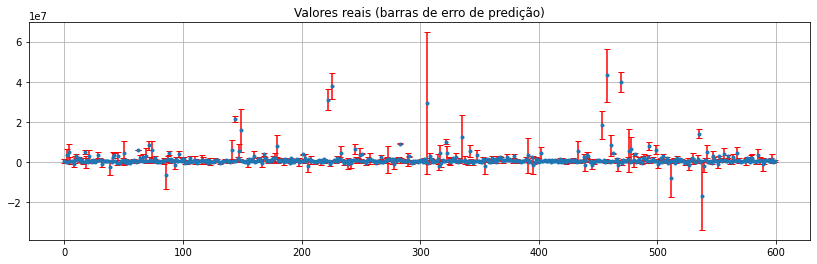

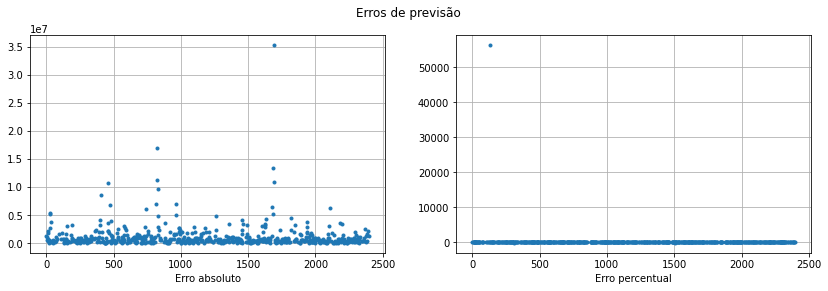

In [12]:
erroperc = RodaModelo(X1,y1,LinearRegression(),graficos=True)

Base de treinamento:(1798, 191)
Base de teste:(600, 191)

Acurácia da base de treinamento: 0.843
Acurácia da base de testes: 0.438

Erro percentual:
 Média: 64.57  Max: 38803.10   Min: -309.75


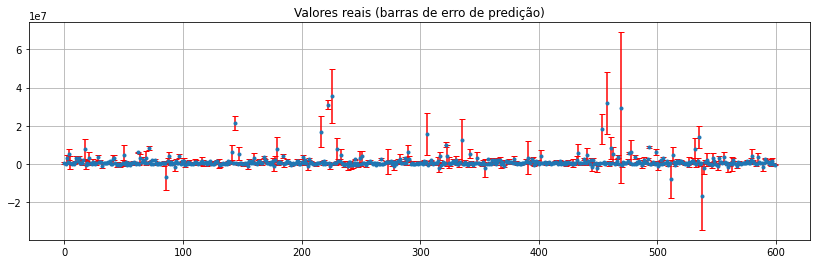

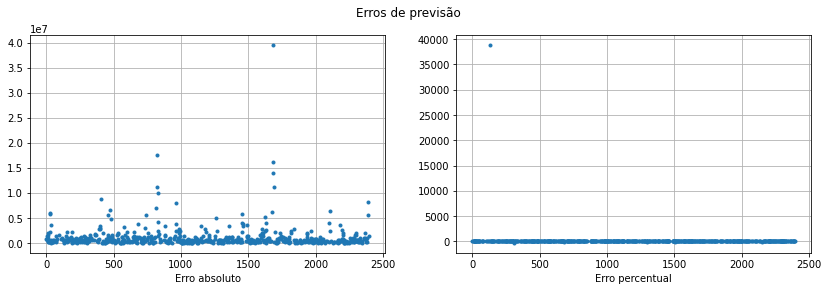

In [13]:
erroperc = RodaModelo(X2,y2,LinearRegression(),graficos=True)

In [14]:
# identifica a linha que apresentou o maior erro
erroperc.loc[erroperc == erroperc.max()]

132    38803.1019
Name: Crescimento, dtype: float64

In [15]:
print(Modelo_final.iloc[132])

Ano                       2007
Município               210530
Nome           IMPERATRIZ (MA)
TB0                        254
TB2                       3640
                    ...       
SE1M                      1333
SE2M                       434
SE1S                    417046
SE2S                     71014
Crescimento             13.268
Name: 132, Length: 195, dtype: object


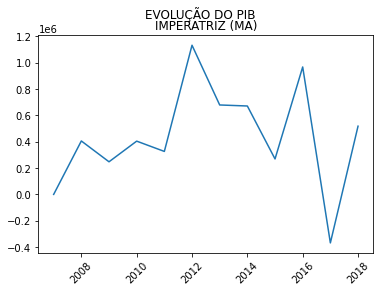

In [16]:
# Exibe um gráfico da evolução do PIB para todos os anos do município 
# IMPERATRIZ (MA)
# para comparação dos dados 
linhas = Modelo_final.loc[
  Modelo_final['Município']==210530].sort_values(['Ano'])[['Ano','Crescimento']]
# plotagem dos dados
figure, axis = plt.subplots(1,1)
plt.suptitle('EVOLUÇÃO DO PIB')
plt.xticks(rotation=45)
axis.plot(linhas['Ano'],linhas['Crescimento'])
axis.set_title('IMPERATRIZ (MA)')
plt.show()

In [17]:
# Exclui a linha da tabela com outlier
Modelo.drop([132],inplace=True)
Modelo_final.drop([132],inplace=True)

In [18]:
# Divide novamente os dados para teste após excluir outlier
X1,y1,X2,y2 = SeparaXy1Xy2(Modelo,Modelo_final)

DATASET PRE-ANÁLISE

       TB0   TB1    TB2    TB3       TB4      TB5     TB6  TB7  ...     RC4S  \
0      633   641   8982   7381   3884.67   139710   45.04 -0.3  ...    -2557   
1      225   133  12099  12021  10369.06   330474   80.77 -0.1  ...    39874   
2      914   867  25559  24298  15258.53   742466  236.63  0.1  ...   477827   
3      811   774  27643  27428  30332.58  1076697  166.77 -0.1  ...   153963   
4      325   247  10104   9041  15191.44   839994  186.92  0.1  ...   -74140   
...    ...   ...    ...    ...       ...      ...     ...  ...  ...      ...   
2395 -4093 -4076  27762  32611  37829.15  6582026  278.14  0.0  ... -1550389   
2396 -4123 -3750 -76622 -72733 -40831.33  5605800  467.03  0.2  ...  1806349   
2397  -928  -963   5505   6868   6336.61  3766656  204.33 -0.4  ...   531040   
2398   386   292  -9344  -8674 -33699.14  3914937  368.14  0.1  ...  -184162   
2399 -2289 -2248  -5694  -4244  -3484.31  3225761  213.88  0.1  ...  3791959   

         RC6S     

Base de treinamento:(1799, 226)
Base de teste:(600, 226)

Acurácia da base de treinamento: 0.836
Acurácia da base de testes: 0.540

Erro percentual:
 Média: 0.37  Max: 185.93   Min: -389.58


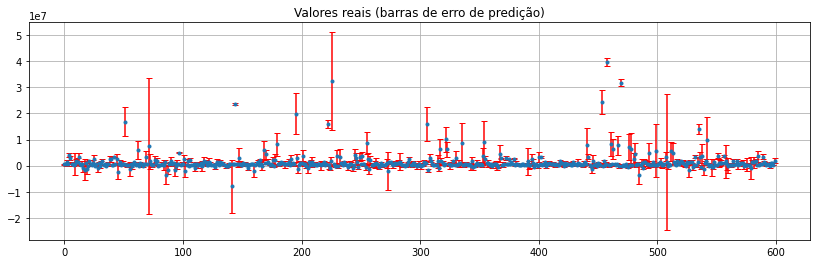

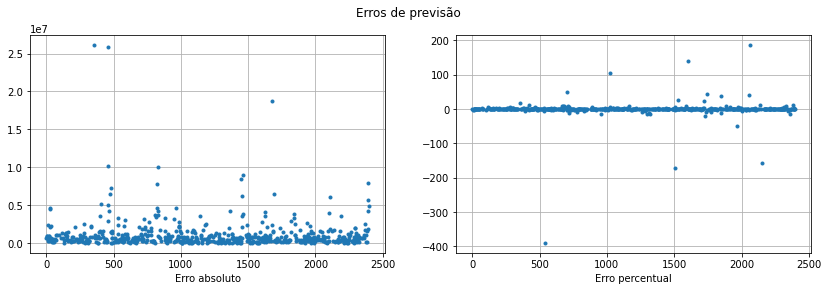

In [19]:
erroperc = RodaModelo(X1,y1,LinearRegression(),graficos=True)

Base de treinamento:(1797, 191)
Base de teste:(600, 191)

Acurácia da base de treinamento: 0.825
Acurácia da base de testes: 0.640

Erro percentual:
 Média: -0.04  Max: 122.06   Min: -280.29


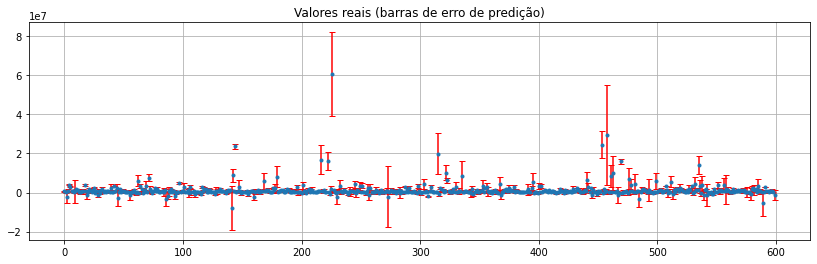

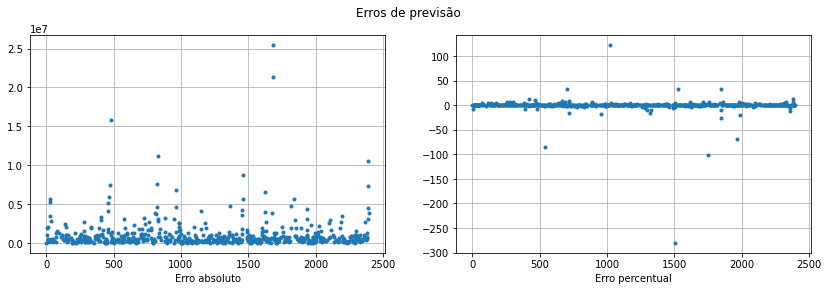

In [20]:
erroperc = RodaModelo(X2,y2,LinearRegression(),graficos=True)

## Seleção de variáveis teste estatístico f_regression

### teste para o dataset pré-análise

In [21]:
# teste inicial selecionando metade das features
fit = SelectKBest(score_func=f_regression, k=113).fit(X1,y1)

features = fit.transform(X1)

# Visualizando as features:
print(features)

[[ 6.3300000e+02  6.4100000e+02  8.9820000e+03 ...  1.7680000e+03
   6.6800000e+02  3.2893000e+05]
 [ 2.2500000e+02  1.3300000e+02  1.2099000e+04 ...  2.5600000e+03
   1.3360000e+03  1.0462020e+06]
 [ 9.1400000e+02  8.6700000e+02  2.5559000e+04 ...  1.6721000e+04
   4.0220000e+03  1.6814070e+07]
 ...
 [-9.2800000e+02 -9.6300000e+02  5.5050000e+03 ... -1.9176000e+04
  -9.3510000e+03 -6.2781494e+07]
 [ 3.8600000e+02  2.9200000e+02 -9.3440000e+03 ... -1.8790000e+03
  -1.5150000e+03 -3.8239371e+07]
 [-2.2890000e+03 -2.2480000e+03 -5.6940000e+03 ...  6.3110000e+03
   7.1170000e+03 -8.0216970e+06]]


In [22]:
cols = fit.get_support(indices=True)
print(X1.iloc[:,cols])

       TB0   TB1    TB2    TB3       TB4      TB5  GG1M  GG2M  ...  RC9M  \
0      633   641   8982   7381   3884.67   139710   -34    -4  ...    89   
1      225   133  12099  12021  10369.06   330474   -59   150  ...   432   
2      914   867  25559  24298  15258.53   742466    36   338  ...   886   
3      811   774  27643  27428  30332.58  1076697  -104   438  ...   772   
4      325   247  10104   9041  15191.44   839994  -193    83  ...  1221   
...    ...   ...    ...    ...       ...      ...   ...   ...  ...   ...   
2395 -4093 -4076  27762  32611  37829.15  6582026 -1934  1626  ...  2633   
2396 -4123 -3750 -76622 -72733 -40831.33  5605800 -2170  2474  ...  7152   
2397  -928  -963   5505   6868   6336.61  3766656 -2584   -36  ...  6927   
2398   386   292  -9344  -8674 -33699.14  3914937 -2379 -1426  ...  8831   
2399 -2289 -2248  -5694  -4244  -3484.31  3225761 -1836  3631  ...  6690   

        RC1S      RC2S     RC6S      RC9S   SE1M  SE2M      SE1S  
0       4426   -3701

In [23]:
# separa os parâmetros e o alvo
X_fr = X1.iloc[:,cols]
print(X_fr)
print(y1)

       TB0   TB1    TB2    TB3       TB4      TB5  GG1M  GG2M  ...  RC9M  \
0      633   641   8982   7381   3884.67   139710   -34    -4  ...    89   
1      225   133  12099  12021  10369.06   330474   -59   150  ...   432   
2      914   867  25559  24298  15258.53   742466    36   338  ...   886   
3      811   774  27643  27428  30332.58  1076697  -104   438  ...   772   
4      325   247  10104   9041  15191.44   839994  -193    83  ...  1221   
...    ...   ...    ...    ...       ...      ...   ...   ...  ...   ...   
2395 -4093 -4076  27762  32611  37829.15  6582026 -1934  1626  ...  2633   
2396 -4123 -3750 -76622 -72733 -40831.33  5605800 -2170  2474  ...  7152   
2397  -928  -963   5505   6868   6336.61  3766656 -2584   -36  ...  6927   
2398   386   292  -9344  -8674 -33699.14  3914937 -2379 -1426  ...  8831   
2399 -2289 -2248  -5694  -4244  -3484.31  3225761 -1836  3631  ...  6690   

        RC1S      RC2S     RC6S      RC9S   SE1M  SE2M      SE1S  
0       4426   -3701

In [24]:
#Roda o modelo com as colunas selecionadas
erroperc = RodaModelo(X_fr, y1, LinearRegression())

Base de treinamento:(1799, 113)
Base de teste:(600, 113)

Acurácia da base de treinamento: 0.811
Acurácia da base de testes: 0.713

Erro percentual:
 Média: 0.50  Max: 213.48   Min: -264.37


In [25]:
# obtem as acurácias da base de treinamento e de teste variando a quantidade de
# parâmetros a serem selecionados
ac_tr, ac_te = Acuracias_fr(X1,y1,LinearRegression())

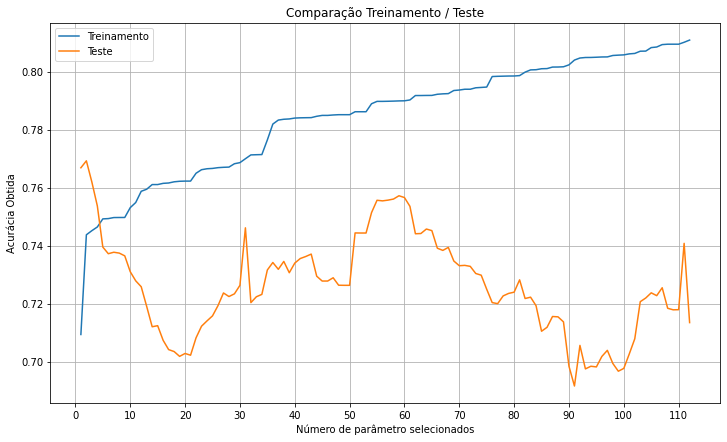

In [26]:
# Plota a comparação entre acurácias de Treinamento e de Teste
Plota_ac(ac_tr,ac_te)

In [27]:
# encontra qual a quantidade de características com melhor resultado
l = ac_te[50:60]
print("Número de parâmetros com melhor resultado: "+str(l.index(max(l))+50+1))

Número de parâmetros com melhor resultado: 59


In [28]:
# seleciona as 59 features mais adequadas à predição
fit = SelectKBest(score_func=f_regression, k=59).fit(X1,y1)
features = fit.transform(X1)
cols = fit.get_support(indices=True)
# separa os parâmetros e o alvo
X_fr = X1.iloc[:,cols]

In [29]:
#Roda o modelo com as colunas selecionadas
erroperc = RodaModelo(X_fr, y1, LinearRegression())

Base de treinamento:(1799, 59)
Base de teste:(600, 59)

Acurácia da base de treinamento: 0.790
Acurácia da base de testes: 0.757

Erro percentual:
 Média: 0.54  Max: 162.16   Min: -174.87


### teste para o dataset pós-análise

In [30]:
# teste inicial selecionando metade das features
fit = SelectKBest(score_func=f_regression, k=96).fit(X2,y2)

features = fit.transform(X2)

# Visualizando as features:
print(features)

[[ 6.3300000e+02  8.9820000e+03  3.8846700e+03 ...  1.7680000e+03
   6.6800000e+02  3.2893000e+05]
 [ 2.2500000e+02  1.2099000e+04  1.0369060e+04 ...  2.5600000e+03
   1.3360000e+03  1.0462020e+06]
 [ 9.1400000e+02  2.5559000e+04  1.5258530e+04 ...  1.6721000e+04
   4.0220000e+03  1.6814070e+07]
 ...
 [-9.2800000e+02  5.5050000e+03  6.3366100e+03 ... -1.9176000e+04
  -9.3510000e+03 -6.2781494e+07]
 [ 3.8600000e+02 -9.3440000e+03 -3.3699140e+04 ... -1.8790000e+03
  -1.5150000e+03 -3.8239371e+07]
 [-2.2890000e+03 -5.6940000e+03 -3.4843100e+03 ...  6.3110000e+03
   7.1170000e+03 -8.0216970e+06]]


In [31]:
cols = fit.get_support(indices=True)
print(X2.iloc[:,cols])

       TB0    TB2       TB4      TB5  GG1M  GG2M  GG3M  GG4M  ...  RC9M  \
0      633   8982   3884.67   139710   -34    -4   262   358  ...    89   
1      225  12099  10369.06   330474   -59   150   107   492  ...   432   
2      914  25559  15258.53   742466    36   338  1066  1155  ...   886   
3      811  27643  30332.58  1076697  -104   438   699   495  ...   772   
4      325  10104  15191.44   839994  -193    83   300   197  ...  1221   
...    ...    ...       ...      ...   ...   ...   ...   ...  ...   ...   
2393 -4093  27762  37829.15  6582026 -1934  1626  1274  7361  ...  2633   
2394 -4123 -76622 -40831.33  5605800 -2170  2474  1267 -3666  ...  7152   
2395  -928   5505   6336.61  3766656 -2584   -36  -615 -6318  ...  6927   
2396   386  -9344 -33699.14  3914937 -2379 -1426  2318  -719  ...  8831   
2397 -2289  -5694  -3484.31  3225761 -1836  3631  5048  3571  ...  6690   

        RC1S      RC2S     RC6S      RC9S   SE1M  SE2M      SE1S  
0       4426   -370125   -53419 

In [32]:
# separa os parâmetros e o alvo
X_fr = X2.iloc[:,cols]
print(X_fr)
print(y2)

       TB0    TB2       TB4      TB5  GG1M  GG2M  GG3M  GG4M  ...  RC9M  \
0      633   8982   3884.67   139710   -34    -4   262   358  ...    89   
1      225  12099  10369.06   330474   -59   150   107   492  ...   432   
2      914  25559  15258.53   742466    36   338  1066  1155  ...   886   
3      811  27643  30332.58  1076697  -104   438   699   495  ...   772   
4      325  10104  15191.44   839994  -193    83   300   197  ...  1221   
...    ...    ...       ...      ...   ...   ...   ...   ...  ...   ...   
2393 -4093  27762  37829.15  6582026 -1934  1626  1274  7361  ...  2633   
2394 -4123 -76622 -40831.33  5605800 -2170  2474  1267 -3666  ...  7152   
2395  -928   5505   6336.61  3766656 -2584   -36  -615 -6318  ...  6927   
2396   386  -9344 -33699.14  3914937 -2379 -1426  2318  -719  ...  8831   
2397 -2289  -5694  -3484.31  3225761 -1836  3631  5048  3571  ...  6690   

        RC1S      RC2S     RC6S      RC9S   SE1M  SE2M      SE1S  
0       4426   -370125   -53419 

In [33]:
#Roda o modelo com as colunas selecionadas
erroperc = RodaModelo(X_fr, y2, LinearRegression())

Base de treinamento:(1797, 96)
Base de teste:(600, 96)

Acurácia da base de treinamento: 0.807
Acurácia da base de testes: 0.647

Erro percentual:
 Média: 0.12  Max: 170.62   Min: -286.80


In [34]:
# obtem as acurácias da base de treinamento e de teste variando a quantidade de
# parâmetros a serem selecionados
ac_tr, ac_te = Acuracias_fr(X2,y2,LinearRegression())

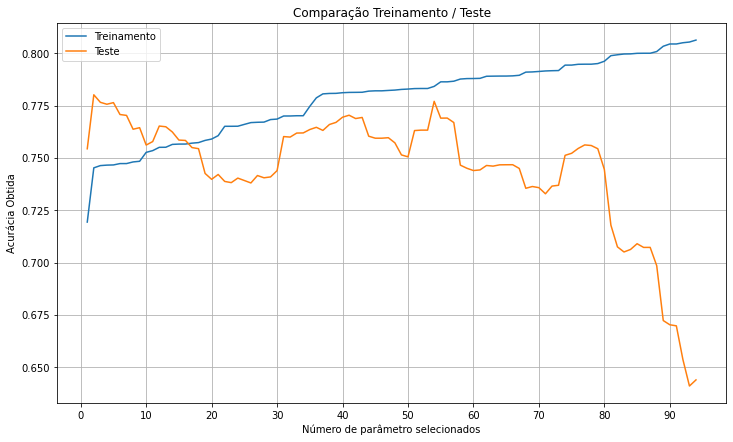

In [35]:
# Plota a comparação entre acurácias de Treinamento e de Teste
Plota_ac(ac_tr,ac_te)

In [36]:
# encontra qual a quantidade características com melhor resultado
l = ac_te[50:60]
print("Número de parâmetros com melhor resultado: "+str(l.index(max(l))+50+1))

Número de parâmetros com melhor resultado: 54


In [37]:
# seleciona as 54 features mais adequadas à predição
fit = SelectKBest(score_func=f_regression, k=54).fit(X2,y2)
features = fit.transform(X2)
cols = fit.get_support(indices=True)
# separa os parâmetros e o alvo
X_fr = X2.iloc[:,cols]

In [38]:
print(X_fr)

          TB5  GG1M  GG2M  GG3M  GG4M  GG5M      GG1S  SP12M  ...     GI3S  \
0      139710   -34    -4   262   358  1041   -167117      1  ...   -27226   
1      330474   -59   150   107   492  1665   -120583      0  ...   191954   
2      742466    36   338  1066  1155  2056     61011      4  ...  1673598   
3     1076697  -104   438   699   495  2558   -286527      5  ...  2201742   
4      839994  -193    83   300   197  1109   -759873     -1  ...  -507875   
...       ...   ...   ...   ...   ...   ...       ...    ...  ...      ...   
2393  6582026 -1934  1626  1274  7361  5471  -6310526    -42  ... -2906269   
2394  5605800 -2170  2474  1267 -3666 -2375 -10535923     11  ... -2166190   
2395  3766656 -2584   -36  -615 -6318 -7683 -13006996    -52  ... -1712734   
2396  3914937 -2379 -1426  2318  -719   531 -13286732   -116  ... -1005903   
2397  3225761 -1836  3631  5048  3571  3107  -8488141    -50  ... -1186270   

         GI4S     GI5S  RC4M   RC8M  RC9M      RC9S  SE2M  
0  

In [39]:
#Roda o modelo com as colunas selecionadas
erroperc = RodaModelo(X_fr, y2, LinearRegression())

Base de treinamento:(1797, 54)
Base de teste:(600, 54)

Acurácia da base de treinamento: 0.784
Acurácia da base de testes: 0.777

Erro percentual:
 Média: -0.02  Max: 181.00   Min: -237.07


In [40]:
# guarda os dados para análise posterior
cols_salva = cols
X_fr_salva = X_fr

##Recursive Feature Elimination – RFE

### RFE - dados de pré-análise

In [41]:
rfe = RFE(LinearRegression(),n_features_to_select=113)
fit = rfe.fit(X1, y1)

# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_)) 

Número de features: 113


In [42]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
print(X1.iloc[:,cols])

       TB0   TB1    TB3       TB4     TB6  TB7  GG0M  GG1M  ...  GI9M  RC1M  \
0      633   641   7381   3884.67   45.04 -0.3     0   -34  ...   225    15   
1      225   133  12021  10369.06   80.77 -0.1     0   -59  ...   286   -13   
2      914   867  24298  15258.53  236.63  0.1     0    36  ...  1113    16   
3      811   774  27428  30332.58  166.77 -0.1     0  -104  ...   712    92   
4      325   247   9041  15191.44  186.92  0.1     0  -193  ...   408   -15   
...    ...   ...    ...       ...     ...  ...   ...   ...  ...   ...   ...   
2395 -4093 -4076  32611  37829.15  278.14  0.0    -2 -1934  ...  3646  -128   
2396 -4123 -3750 -72733 -40831.33  467.03  0.2     0 -2170  ...  4710  -481   
2397  -928  -963   6868   6336.61  204.33 -0.4     0 -2584  ...   197  -471   
2398   386   292  -8674 -33699.14  368.14  0.1     0 -2379  ...   302  -385   
2399 -2289 -2248  -4244  -3484.31  213.88  0.1     0 -1836  ...  8285    79   

      RC4M  RC6M   RC8M  RC9M   SE1M  SE2M  
0     

In [43]:
# Atualiza os parâmetros
X_rfe = X1.iloc[:,cols]
print(X_rfe)

       TB0   TB1    TB3       TB4     TB6  TB7  GG0M  GG1M  ...  GI9M  RC1M  \
0      633   641   7381   3884.67   45.04 -0.3     0   -34  ...   225    15   
1      225   133  12021  10369.06   80.77 -0.1     0   -59  ...   286   -13   
2      914   867  24298  15258.53  236.63  0.1     0    36  ...  1113    16   
3      811   774  27428  30332.58  166.77 -0.1     0  -104  ...   712    92   
4      325   247   9041  15191.44  186.92  0.1     0  -193  ...   408   -15   
...    ...   ...    ...       ...     ...  ...   ...   ...  ...   ...   ...   
2395 -4093 -4076  32611  37829.15  278.14  0.0    -2 -1934  ...  3646  -128   
2396 -4123 -3750 -72733 -40831.33  467.03  0.2     0 -2170  ...  4710  -481   
2397  -928  -963   6868   6336.61  204.33 -0.4     0 -2584  ...   197  -471   
2398   386   292  -8674 -33699.14  368.14  0.1     0 -2379  ...   302  -385   
2399 -2289 -2248  -4244  -3484.31  213.88  0.1     0 -1836  ...  8285    79   

      RC4M  RC6M   RC8M  RC9M   SE1M  SE2M  
0     

In [44]:
erroperc = RodaModelo(X_rfe, y1, LinearRegression())

Base de treinamento:(1799, 113)
Base de teste:(600, 113)

Acurácia da base de treinamento: 0.803
Acurácia da base de testes: 0.529

Erro percentual:
 Média: 0.53  Max: 200.20   Min: -291.58


In [45]:
# obtem as acurácias da base de treinamento e de teste variando a quantidade de
# parâmetros a serem selecionados
ac_tr, ac_te = Acuracias_rfe(X1,y1,LinearRegression())

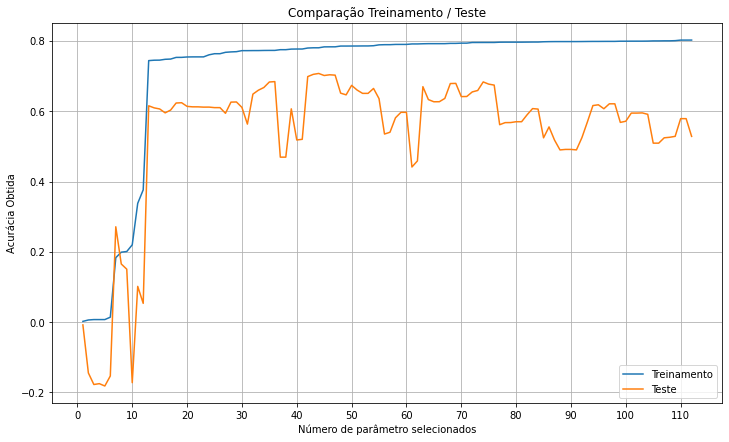

In [46]:
# Plota a comparação entre acurácias de Treinamento e de Teste
Plota_ac(ac_tr,ac_te)

In [47]:
# encontra qual a quantidade de características com melhor resultado
l = ac_te[40:50]
print("Número de parâmetros com melhor resultado: "+str(l.index(max(l))+40+1))

Número de parâmetros com melhor resultado: 44


In [48]:
# teste com o número de features selecionadas
rfe = RFE(LinearRegression(),n_features_to_select=44)
fit = rfe.fit(X1, y1)
cols = fit.get_support(indices=True)
# Atualiza os parâmetros
X_rfe = X1.iloc[:,cols]

In [49]:
erroperc = RodaModelo(X_rfe, y1, LinearRegression())

Base de treinamento:(1799, 44)
Base de teste:(600, 44)

Acurácia da base de treinamento: 0.781
Acurácia da base de testes: 0.708

Erro percentual:
 Média: 0.24  Max: 252.61   Min: -374.69


### RFE - dados de pós-análise

In [50]:
rfe = RFE(LinearRegression(),n_features_to_select=96)
fit = rfe.fit(X2, y2)

# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_)) 

Número de features: 96


In [51]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
print(X2.iloc[:,cols])

      GG1M  GG2M  GG3M  GG4M   GG7M  GG9M      GG7S  SP12M  ...  RC1M   RC2M  \
0      -34    -4   262   358     31    47    -83607      1  ...    15    -76   
1      -59   150   107   492   1226    67    827764      0  ...   -13    780   
2       36   338  1066  1155  10850   813   9930056      4  ...    16   2121   
3     -104   438   699   495  10189   986   9224517      5  ...    92    584   
4     -193    83   300   197   -390  -227  -2714891     -1  ...   -15   -362   
...    ...   ...   ...   ...    ...   ...       ...    ...  ...   ...    ...   
2393 -1934  1626  1274  7361 -10178  -837 -17805493    -42  ...  -128  -8714   
2394 -2170  2474  1267 -3666 -13882  -790 -20989672     11  ...  -481 -33062   
2395 -2584   -36  -615 -6318  -9675  -230 -17007893    -52  ...  -471 -32636   
2396 -2379 -1426  2318  -719  -1033  -588  -4831551   -116  ...  -385 -18073   
2397 -1836  3631  5048  3571    375   -87  -3391633    -50  ...    79  -7879   

      RC4M  RC6M   RC8M  RC9M   SE1M  S

In [52]:
# Atualiza os parâmetros
X_rfe = X2.iloc[:,cols]
print(X_rfe)

      GG1M  GG2M  GG3M  GG4M   GG7M  GG9M      GG7S  SP12M  ...  RC1M   RC2M  \
0      -34    -4   262   358     31    47    -83607      1  ...    15    -76   
1      -59   150   107   492   1226    67    827764      0  ...   -13    780   
2       36   338  1066  1155  10850   813   9930056      4  ...    16   2121   
3     -104   438   699   495  10189   986   9224517      5  ...    92    584   
4     -193    83   300   197   -390  -227  -2714891     -1  ...   -15   -362   
...    ...   ...   ...   ...    ...   ...       ...    ...  ...   ...    ...   
2393 -1934  1626  1274  7361 -10178  -837 -17805493    -42  ...  -128  -8714   
2394 -2170  2474  1267 -3666 -13882  -790 -20989672     11  ...  -481 -33062   
2395 -2584   -36  -615 -6318  -9675  -230 -17007893    -52  ...  -471 -32636   
2396 -2379 -1426  2318  -719  -1033  -588  -4831551   -116  ...  -385 -18073   
2397 -1836  3631  5048  3571    375   -87  -3391633    -50  ...    79  -7879   

      RC4M  RC6M   RC8M  RC9M   SE1M  S

In [53]:
erroperc = RodaModelo(X_rfe, y2, LinearRegression())

Base de treinamento:(1797, 96)
Base de teste:(600, 96)

Acurácia da base de treinamento: 0.788
Acurácia da base de testes: 0.767

Erro percentual:
 Média: 0.33  Max: 203.69   Min: -182.12


In [54]:
# obtem as acurácias da base de treinamento e de teste variando a quantidade de
# parâmetros a serem selecionados
ac_tr, ac_te = Acuracias_rfe(X2,y2,LinearRegression())

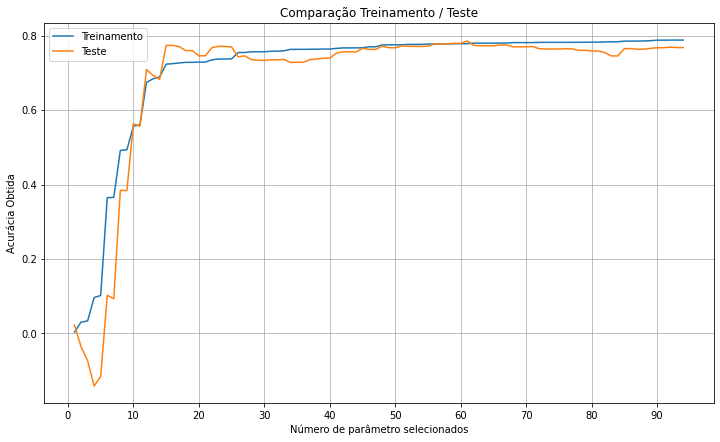

In [55]:
# Plota a comparação entre acurácias de Treinamento e de Teste
Plota_ac(ac_tr,ac_te)

In [56]:
# encontra qual a quantidade de características com melhor resultado
l = ac_te[65:70]
print("Número de parâmetros com melhor resultado: "+str(l.index(max(l))+65+1))

Número de parâmetros com melhor resultado: 67


In [57]:
# teste com o número de features selecionadas
rfe = RFE(LinearRegression(),n_features_to_select=67)
fit = rfe.fit(X2, y2)
cols = fit.get_support(indices=True)
# Atualiza os parâmetros
X_rfe = X2.iloc[:,cols]

In [58]:
erroperc = RodaModelo(X_rfe, y2, LinearRegression())

Base de treinamento:(1797, 67)
Base de teste:(600, 67)

Acurácia da base de treinamento: 0.780
Acurácia da base de testes: 0.775

Erro percentual:
 Média: 0.08  Max: 224.66   Min: -273.83


## Random forest

### Teste de dados pré-análise

In [59]:
erroperc = RodaModelo(X1, y1, RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1))

Base de treinamento:(1799, 226)
Base de teste:(600, 226)

Acurácia da base de treinamento: 0.959
Acurácia da base de testes: 0.709

Erro percentual:
 Média: -0.81  Max: 154.93   Min: -709.21


In [60]:
from sklearn.feature_selection import SelectFromModel

In [61]:
# faz a selecão de parâmetros para o modelo RandomForestRegressor
seletor = SelectFromModel(estimator=RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1),threshold="median").fit(X1, y1)

In [62]:
print("Quantidade de parâmetros selecionados: "+str(np.count_nonzero(seletor.get_support())))

Quantidade de parâmetros selecionados: 113


In [63]:
X_sfm = pd.DataFrame(seletor.transform(X1))
print(X_sfm)

         0       1         2          3       4    5       6       7    ...  \
0      633.0   641.0   3884.67   139710.0   45.04 -0.3    -4.0   262.0  ...   
1      225.0   133.0  10369.06   330474.0   80.77 -0.1   150.0   107.0  ...   
2      914.0   867.0  15258.53   742466.0  236.63  0.1   338.0  1066.0  ...   
3      811.0   774.0  30332.58  1076697.0  166.77 -0.1   438.0   699.0  ...   
4      325.0   247.0  15191.44   839994.0  186.92  0.1    83.0   300.0  ...   
...      ...     ...       ...        ...     ...  ...     ...     ...  ...   
2394 -4093.0 -4076.0  37829.15  6582026.0  278.14  0.0  1626.0  1274.0  ...   
2395 -4123.0 -3750.0 -40831.33  5605800.0  467.03  0.2  2474.0  1267.0  ...   
2396  -928.0  -963.0   6336.61  3766656.0  204.33 -0.4   -36.0  -615.0  ...   
2397   386.0   292.0 -33699.14  3914937.0  368.14  0.1 -1426.0  2318.0  ...   
2398 -2289.0 -2248.0  -3484.31  3225761.0  213.88  0.1  3631.0  5048.0  ...   

         105      106     107       108        109 

In [64]:
erroperc = RodaModelo(X_sfm, y1, RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1))

Base de treinamento:(1799, 113)
Base de teste:(600, 113)

Acurácia da base de treinamento: 0.959
Acurácia da base de testes: 0.705

Erro percentual:
 Média: -0.89  Max: 163.02   Min: -740.50


### Teste de dados pós-análise

In [65]:
erroperc = RodaModelo(X2, y2, RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1))

Base de treinamento:(1797, 191)
Base de teste:(600, 191)

Acurácia da base de treinamento: 0.960
Acurácia da base de testes: 0.751

Erro percentual:
 Média: -1.79  Max: 171.62   Min: -1158.51


In [66]:
# faz a selecão de parâmetros para o modelo RandomForestRegressor
seletor = SelectFromModel(estimator=RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1),threshold="median").fit(X2, y2)
print("Quantidade de parâmetros selecionados: "+str(np.count_nonzero(seletor.get_support())))

Quantidade de parâmetros selecionados: 96


In [67]:
X_sfm = pd.DataFrame(seletor.transform(X2))
print(X_sfm)

          0        1         2          3       4       5       6   \
0      633.0   8982.0   3884.67   139710.0    -4.0   262.0  1041.0   
1      225.0  12099.0  10369.06   330474.0   150.0   107.0  1665.0   
2      914.0  25559.0  15258.53   742466.0   338.0  1066.0  2056.0   
3      811.0  27643.0  30332.58  1076697.0   438.0   699.0  2558.0   
4      325.0  10104.0  15191.44   839994.0    83.0   300.0  1109.0   
...      ...      ...       ...        ...     ...     ...     ...   
2392 -4093.0  27762.0  37829.15  6582026.0  1626.0  1274.0  5471.0   
2393 -4123.0 -76622.0 -40831.33  5605800.0  2474.0  1267.0 -2375.0   
2394  -928.0   5505.0   6336.61  3766656.0   -36.0  -615.0 -7683.0   
2395   386.0  -9344.0 -33699.14  3914937.0 -1426.0  2318.0   531.0   
2396 -2289.0  -5694.0  -3484.31  3225761.0  3631.0  5048.0  3107.0   

              7   ...     88       89      90        91         92  \
0    -1.6712e+05  ...  -85.0   2470.0    89.0    4426.0   -53419.0   
1    -1.2058e+05  .

In [68]:
erroperc = RodaModelo(X_sfm, y2, RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1))

Base de treinamento:(1797, 96)
Base de teste:(600, 96)

Acurácia da base de treinamento: 0.960
Acurácia da base de testes: 0.757

Erro percentual:
 Média: -1.81  Max: 170.98   Min: -1187.64


## HuberRegressor

### teste dados pré-análise

In [69]:
from sklearn.linear_model import HuberRegressor

In [70]:
erroperc = RodaModelo(X1, y1, HuberRegressor(max_iter=1000))

Base de treinamento:(1799, 226)
Base de teste:(600, 226)

Acurácia da base de treinamento: 0.757
Acurácia da base de testes: 0.756

Erro percentual:
 Média: 0.05  Max: 124.21   Min: -347.49


In [71]:
# faz a selecão de parâmetros para o modelo RandomForestRegressor
seletor = SelectFromModel(estimator=HuberRegressor(max_iter=1000)).fit(X1, y1)
print("Quantidade de parâmetros selecionados: "+str(np.count_nonzero(seletor.get_support())))

Quantidade de parâmetros selecionados: 63


In [72]:
X_sfm = pd.DataFrame(seletor.transform(X1))
print(X_sfm)

             0           1           2           3           4           5   \
0      139710.0 -1.6712e+05  1.1835e+05  7.7794e+04  5.2680e+04 -8.3607e+04   
1      330474.0 -1.2058e+05  1.7678e+05  1.0680e+05  1.0989e+05  8.2776e+05   
2      742466.0  6.1011e+04  1.6999e+06  1.5585e+06  5.4054e+05  9.9301e+06   
3     1076697.0 -2.8653e+05  1.4658e+06  1.0250e+06  1.6637e+05  9.2245e+06   
4      839994.0 -7.5987e+05  1.1325e+05 -1.7997e+05 -1.2591e+05 -2.7149e+06   
...         ...         ...         ...         ...         ...         ...   
2394  6582026.0 -6.3105e+06  6.3060e+05 -2.1424e+06 -2.3430e+06 -1.7805e+07   
2395  5605800.0 -1.0536e+07  1.2082e+07  1.6903e+06 -1.6948e+07 -2.0990e+07   
2396  3766656.0 -1.3007e+07 -7.0748e+06 -3.5164e+06 -3.0180e+07 -1.7008e+07   
2397  3914937.0 -1.3287e+07 -1.2415e+07 -3.0928e+05 -1.8482e+07 -4.8316e+06   
2398  3225761.0 -8.4881e+06  1.4772e+07  1.0159e+07 -7.0935e+06 -3.3916e+06   

             6          7   ...         55         

In [73]:
erroperc = RodaModelo(X_sfm, y1, HuberRegressor(max_iter=1000))

Base de treinamento:(1799, 63)
Base de teste:(600, 63)

Acurácia da base de treinamento: 0.747
Acurácia da base de testes: 0.770

Erro percentual:
 Média: -0.05  Max: 144.64   Min: -343.58


### teste dados pós-análise

In [74]:
erroperc = RodaModelo(X2, y2, HuberRegressor(max_iter=1000))

Base de treinamento:(1797, 191)
Base de teste:(600, 191)

Acurácia da base de treinamento: 0.757
Acurácia da base de testes: 0.762

Erro percentual:
 Média: -0.27  Max: 131.76   Min: -327.87


In [75]:
# faz a selecão de parâmetros para o modelo RandomForestRegressor
seletor = SelectFromModel(estimator=HuberRegressor(max_iter=1000)).fit(X2, y2)
print("Quantidade de parâmetros selecionados: "+str(np.count_nonzero(seletor.get_support())))

Quantidade de parâmetros selecionados: 60


In [76]:
X_sfm = pd.DataFrame(seletor.transform(X2))
print(X_sfm)

             0           1           2           3           4           5   \
0      139710.0 -1.6712e+05  1.1835e+05  7.7794e+04  5.2680e+04 -8.3607e+04   
1      330474.0 -1.2058e+05  1.7678e+05  1.0680e+05  1.0989e+05  8.2776e+05   
2      742466.0  6.1011e+04  1.6999e+06  1.5585e+06  5.4054e+05  9.9301e+06   
3     1076697.0 -2.8653e+05  1.4658e+06  1.0250e+06  1.6637e+05  9.2245e+06   
4      839994.0 -7.5987e+05  1.1325e+05 -1.7997e+05 -1.2591e+05 -2.7149e+06   
...         ...         ...         ...         ...         ...         ...   
2392  6582026.0 -6.3105e+06  6.3060e+05 -2.1424e+06 -2.3430e+06 -1.7805e+07   
2393  5605800.0 -1.0536e+07  1.2082e+07  1.6903e+06 -1.6948e+07 -2.0990e+07   
2394  3766656.0 -1.3007e+07 -7.0748e+06 -3.5164e+06 -3.0180e+07 -1.7008e+07   
2395  3914937.0 -1.3287e+07 -1.2415e+07 -3.0928e+05 -1.8482e+07 -4.8316e+06   
2396  3225761.0 -8.4881e+06  1.4772e+07  1.0159e+07 -7.0935e+06 -3.3916e+06   

             6          7   ...          52        

In [77]:
erroperc = RodaModelo(X_sfm, y2, HuberRegressor(max_iter=1000))

Base de treinamento:(1797, 60)
Base de teste:(600, 60)

Acurácia da base de treinamento: 0.763
Acurácia da base de testes: 0.768

Erro percentual:
 Média: 0.03  Max: 131.13   Min: -182.54


# Dados do modelo selecionado

In [78]:
print(X_fr_salva)

          TB5  GG1M  GG2M  GG3M  GG4M  GG5M      GG1S  SP12M  ...     GI3S  \
0      139710   -34    -4   262   358  1041   -167117      1  ...   -27226   
1      330474   -59   150   107   492  1665   -120583      0  ...   191954   
2      742466    36   338  1066  1155  2056     61011      4  ...  1673598   
3     1076697  -104   438   699   495  2558   -286527      5  ...  2201742   
4      839994  -193    83   300   197  1109   -759873     -1  ...  -507875   
...       ...   ...   ...   ...   ...   ...       ...    ...  ...      ...   
2393  6582026 -1934  1626  1274  7361  5471  -6310526    -42  ... -2906269   
2394  5605800 -2170  2474  1267 -3666 -2375 -10535923     11  ... -2166190   
2395  3766656 -2584   -36  -615 -6318 -7683 -13006996    -52  ... -1712734   
2396  3914937 -2379 -1426  2318  -719   531 -13286732   -116  ... -1005903   
2397  3225761 -1836  3631  5048  3571  3107  -8488141    -50  ... -1186270   

         GI4S     GI5S  RC4M   RC8M  RC9M      RC9S  SE2M  
0  

In [79]:
X_fr_salva.columns

Index(['TB5', 'GG1M', 'GG2M', 'GG3M', 'GG4M', 'GG5M', 'GG1S', 'SP12M', 'SP14M',
       'SP21M', 'SP22M', 'SP32M', 'SP33M', 'SP41M', 'SP42M', 'SP51M', 'SP52M',
       'SP78M', 'SP12S', 'SP14S', 'SP23S', 'SP32S', 'SP76S', 'IS16M', 'IS17M',
       'IS18M', 'IS19M', 'IS20M', 'IS21M', 'IS22M', 'IS23M', 'IS08S', 'IS10S',
       'IS18S', 'FE1M', 'FE1S', 'FE2S', 'FE3S', 'FE4S', 'FE5S', 'FE6S', 'FE7S',
       'GI3M', 'GI7M', 'GI8M', 'GI9M', 'GI3S', 'GI4S', 'GI5S', 'RC4M', 'RC8M',
       'RC9M', 'RC9S', 'SE2M'],
      dtype='object')

In [80]:
# correlação entre os parâmetros
temp = pd.concat([X_fr_salva, y2], axis=1)
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao.iloc[54])

TB5            0.8542
GG1M          -0.5567
GG2M           0.5664
GG3M           0.5340
GG4M           0.5427
GG5M           0.7022
GG1S          -0.5236
SP12M         -0.4796
SP14M         -0.5612
SP21M          0.5299
SP22M          0.7299
SP32M          0.7308
SP33M          0.5621
SP41M          0.4526
SP42M          0.5659
SP51M          0.7275
SP52M          0.4771
SP78M          0.5361
SP12S         -0.4858
SP14S         -0.5324
SP23S         -0.4537
SP32S          0.5242
SP76S         -0.4722
IS16M          0.5278
IS17M          0.5608
IS18M          0.4583
IS19M          0.5150
IS20M          0.4832
IS21M          0.5611
IS22M          0.7912
IS23M          0.6567
IS08S         -0.6032
IS10S         -0.4593
IS18S         -0.4869
FE1M           0.8480
FE1S           0.8392
FE2S          -0.4486
FE3S          -0.5054
FE4S          -0.4818
FE5S          -0.4850
FE6S          -0.4764
FE7S          -0.4716
GI3M          -0.5495
GI7M           0.6785
GI8M           0.6159
GI9M      

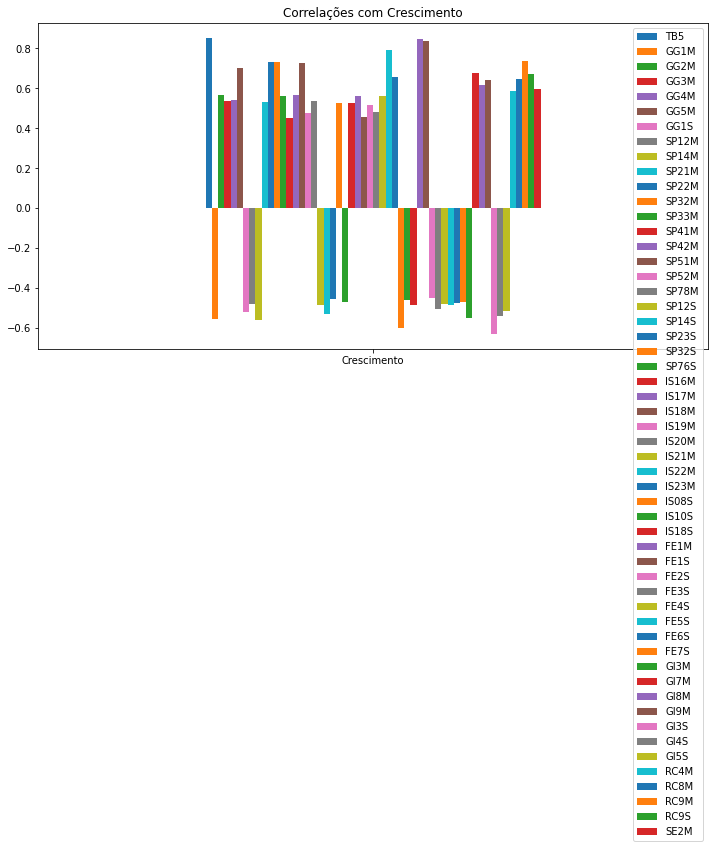

In [81]:
bar = correlacao.loc[['Crescimento'],X_fr_salva.columns].plot(
    kind="bar", figsize=(12,6),title='Correlações com Crescimento',rot=0)